# Importation

## Importation bibliothèques

In [ ]:
#montage disque google drive
from google.colab import drive
drive.mount('/content/drive/')
# Set working directory
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Projet 7/')
!pip install SHAP

Mounted at /content/drive/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.3 MB/s 


In [ ]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
from pandas.io.parsers.readers import read_csv

pd.set_option("display.max_rows", None, "display.max_columns", None)

# sklearn preprocessing for dealing with categorical variables less than 2 categories
from sklearn.preprocessing import LabelEncoder

# sklearn preprocessing for dealing with categorical variables less than 2 categories
from sklearn.preprocessing import OneHotEncoder

#Visualize Missing Data
import missingno

# graphiques
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score 
from sklearn.metrics import recall_score, precision_score, fbeta_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.svm import SVC
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.tree import DecisionTreeClassifier
#Gradient Boosting Machine Modeling
import lightgbm as lgb
from lightgbm import LGBMClassifier
# Importation du package
from imblearn.over_sampling import SMOTE
from joblib import dump, load
import pickle

from sklearn import feature_selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE, RFECV

import shap

# importation meilleur modele

In [ ]:
#lancement pour ganger du temps
X_train_smote = pd.read_csv('./Saved_data/X_train_smote.csv')
y_train_smote = pd.read_csv('./Saved_data/y_train_smote.csv')
X_test = pd.read_csv('./Saved_data/X_test.csv')
y_test = pd.read_csv('./Saved_data/y_test.csv')
X_val = pd.read_csv('./Saved_data/X_val.csv')
y_val = pd.read_csv('./Saved_data/y_val.csv')

reduced_X_train_smote = pd.read_csv('./Saved_data/reduced_X_train_smote.csv')
reduced_X_test = pd.read_csv('./Saved_data/reduced_X_test.csv')
reduced_X_val= pd.read_csv('./Saved_data/reduced_X_val.csv')

In [ ]:
# reduced_X_train_smote.drop('Unnamed: 0', axis=1, inplace=True)
# reduced_X_test.drop('Unnamed: 0', axis=1, inplace=True)
# reduced_X_val.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
def memory_compression_float(df):
  compressed_df = df.apply(pd.to_numeric, downcast='float')
  return compressed_df
X_train_smote = memory_compression_float(X_train_smote)
y_train_smote = memory_compression_float(y_train_smote)
X_test = memory_compression_float(X_test)
y_test = memory_compression_float(y_test)
X_val = memory_compression_float(X_val)
y_val = memory_compression_float(y_val)
reduced_X_train_smote = memory_compression_float(reduced_X_train_smote)
reduced_X_test = memory_compression_float(reduced_X_test)
reduced_X_val = memory_compression_float(reduced_X_val)

In [ ]:
models_results=pd.read_csv('./Models/Models_results.csv')
models_results

Model Type  F1-Score  FBeta-Score  Recall_score  \
0  logistic regression classifier  0.000000     0.000000      0.000000   
1        decision tree classifier  0.139535     0.146566      0.151662   

   Precision_score  Roc_AUC_score  
0         0.000000       0.578986  
1         0.129204       0.541784

In [ ]:
loaded_model_name="./Models/threshold RFE_light gradient boosting machine classifier.pkl"
loaded_model=pickle.load(open(loaded_model_name, 'rb'))
loaded_model

LGBMClassifier(class_weight='balanced', random_state=0, reg_alpha=0.25,
               reg_lambda=1.0)

In [ ]:
!python --version

In [ ]:
d_train = lgb.Dataset(reduced_X_train_smote, label=y_train_smote)
d_val = lgb.Dataset(reduced_X_val, label=y_val)
d_test = lgb.Dataset(reduced_X_test, label=y_test)

# SHAP

## Interprétabilité globale

In [ ]:
# y_pred = loaded_model.predict(reduced_X_test)
# explainer = shap.TreeExplainer(loaded_model)
# shap_values = explainer.shap_values(reduced_X_test)
def necessary_datas(model, df):
  df_y_pred = model.predict(df)
  df_explainer = shap.TreeExplainer(model)
  df_shap_values = df_explainer.shap_values(df)
  return df_y_pred, df_explainer, df_shap_values
y_pred, explainer, shap_values=necessary_datas(loaded_model, reduced_X_test)

In [ ]:
type(loaded_model)

lightgbm.sklearn.LGBMClassifier

In [ ]:
pickle.dump(y_pred, open('./Saved_data/y_pred_reduced_X_test.pkl', 'wb'))
pickle.dump(explainer, open('./Saved_data/explainer_reduced_X_test.pkl', 'wb'))
pickle.dump(shap_values, open('./Saved_data/shap_values_reduced_X_test.pkl', 'wb'))

In [ ]:
loaded_explainer_name="./Saved_data/explainer_reduced_X_test.pkl"
explainer=pickle.load(open(loaded_explainer_name, 'rb'))
loaded_shap_values_name="./Saved_data/shap_values_reduced_X_test.pkl"
shap_values=pickle.load(open(loaded_shap_values_name, 'rb'))

In [ ]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

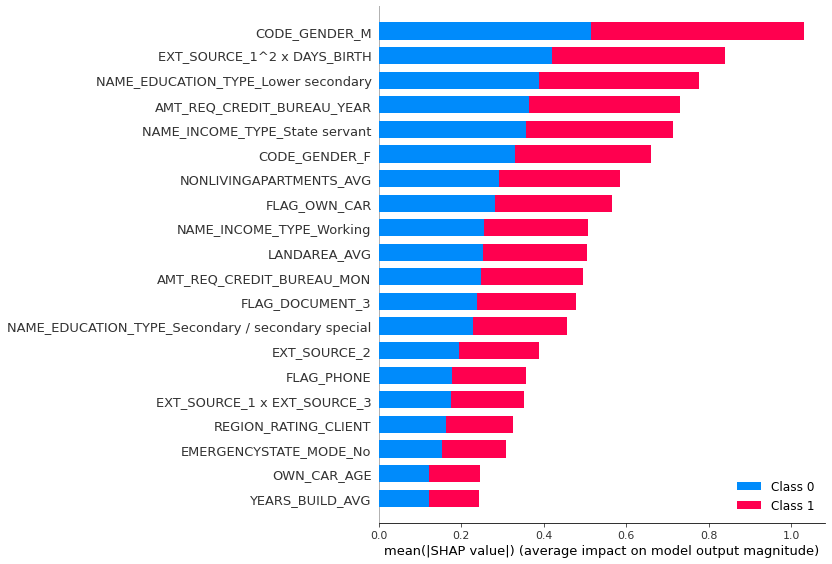

In [ ]:
shap.summary_plot(shap_values, reduced_X_test)

### Classe 0 de la TARGET

In [ ]:
for col in reduced_X_test.columns:
  shap.dependence_plot(col, shap_values[0], reduced_X_test)

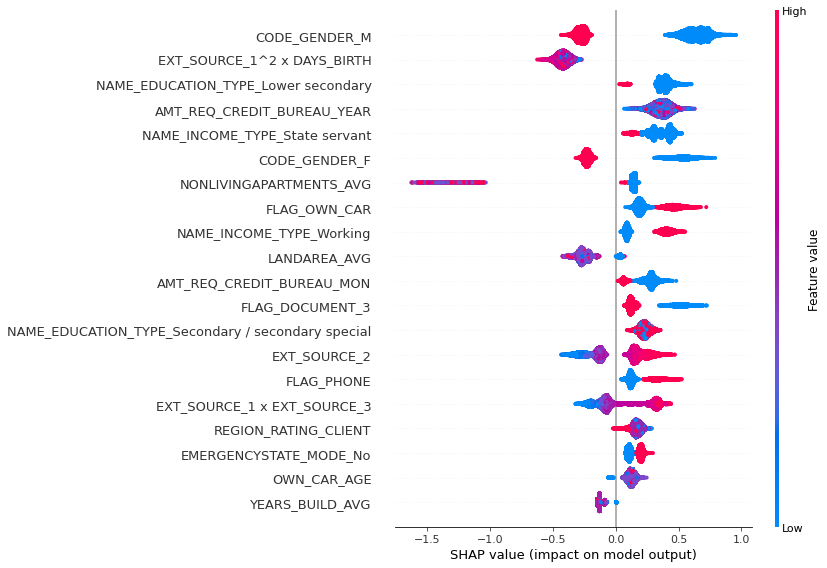

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[0], reduced_X_test)

### Classe 1 de la TARGET

In [ ]:
for col in reduced_X_test.columns:
  shap.dependence_plot(col, shap_values[1], reduced_X_test)

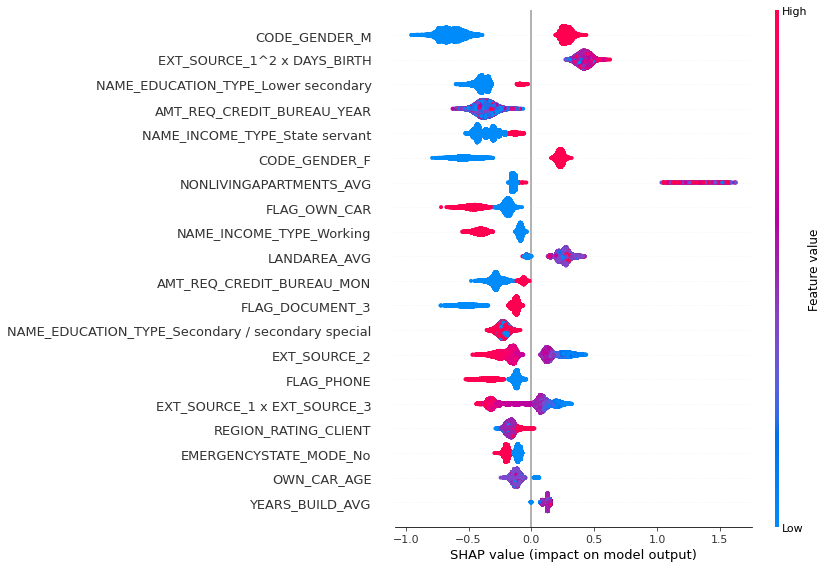

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[1], reduced_X_test)

### Importance des features sur la TARGET pour notre modèle

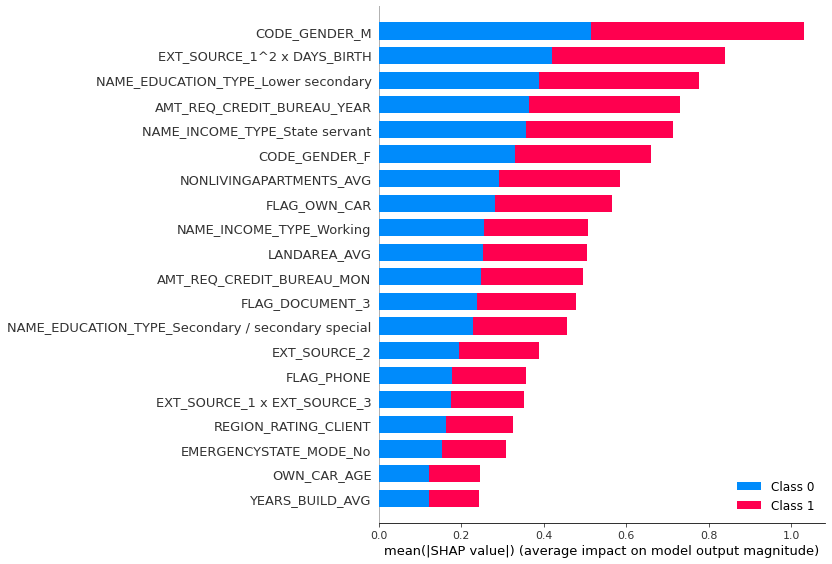

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, reduced_X_test)

## Interprétabilité locale

### Fonctions communes

In [ ]:
def index_customer(df, client_id):
  number=df.loc[df['SK_ID_CURR']==client_id].index[0]
  return number


def force_plot_target(level,client_id,df):
  number=index_customer(df, client_id)
  shap.initjs()
  shap.force_plot(explainer.expected_value[level], 
                  shap_values[level][number], 
                  df.iloc[number,:])
  # return shap.getjs()

def summary_plot_target(level, client_id, df):
  number=index_customer(df, client_id)
  shap.initjs()
  shap.summary_plot(shap_values[level][number], df.iloc[number,:])
  # return shap.getjs()

def customer_charts(df, client_id,chart_type,level):
  number=index_customer(df, client_id)
  if chart_type=="summary":
    summary_plot_target(level,number)
  if chart_type=="force":
    force_plot_target(level,number)
  # return shap.getjs()

def bar_plot(level, client_id, df, shap_values_df):
  number=index_customer(df, client_id)
  shap.bar_plot(shap_values_df[level][number], feature_names=df.columns)#, max_display=int(0.1*len(reduced_X_test.columns)))

### Client aléatoire

In [ ]:
import random
#ligne au hasard
ligne=random.sample(range(len(y_test)),k=1)

In [ ]:
#client au hasard
client=reduced_X_test.loc[ligne,'SK_ID_CURR'].values[0].astype(int)
client

397687

In [ ]:
nombre=index_customer(reduced_X_test, client)

In [ ]:
nombre

27956

In [ ]:
bar_plot(1,client,reduced_X_test,shap_values)

In [ ]:
shap.waterfall_plot(explainer.expected_value, explainer.shap_values(reduced_X_test[0].reshape(1,-1))[0], feature_names=reduced_X_test.columns)
# ,
#                     max_display=len(boston.feature_names),
#                     )
# explainer.expected_value

KeyError: ignored

In [ ]:
shap_values[0][nombre].reshape(1,-1)

array([[ 1.91643055e-01,  1.41983459e-01,  5.92088047e-02,
        -1.93857069e-01,  5.34312426e-01,  3.45682694e-03,
         1.52795605e-03,  2.17999639e-02,  9.42066037e-03,
         2.01679450e-02,  3.01269542e-01,  9.52511298e-02,
         3.10591170e-03,  3.99915919e-01,  2.38156222e-01,
        -3.67928871e-03,  3.12122459e-03,  5.98250521e-04,
         1.40901020e-02,  9.05122441e-03,  1.95557846e-03,
         7.65291880e-04,  1.75554902e-02,  1.78201252e-02,
         5.03650982e-03,  2.12520792e-02,  2.32943716e-03,
         1.69800659e-02,  3.19287877e-04,  5.70340468e-03,
         3.75436027e-02,  1.28791715e-02,  1.19098239e-02,
         2.53058525e-02,  3.54423174e-02, -2.53523856e-04,
         3.93696454e-02,  1.28284468e-03, -6.55714505e-04,
        -1.21272644e-03,  5.87382911e-02,  5.12864622e-04,
         1.96565775e-02,  1.71616023e-01,  1.34370128e-01,
         1.77927303e-02,  1.87271756e-01,  2.50850105e-04,
         4.33607444e-03, -1.16712143e-02, -4.66192062e-0

### Classe 0 de la TARGET

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], 
                shap_values[0][nombre], 
                reduced_X_test.iloc[nombre,:])

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[0][nombre], reduced_X_test.iloc[nombre,:])

AssertionError: ignored

Pour le client 34305 de la classe 0 de la TARGET, 
* les variables importantes sont FLAG_ON_CAR=1,CODE_GENDER_f=0, NAME_FAMILY_STATUS_married=1, FLAG_PHONE=1, EXT_SOURCE_3, REGION_RATING_CLIENT=2, FLAG_WORK_PHONE=0OBS_30_CNT_SOCIAL_CIRCLE=0...
* les variables sans importance sont EXT_SOURCE_2=0.189, CREDIT_DURATION=256, CODE_GENDER_m=1, EXT_SOURCE_1...

### Classe 1 de la TARGET

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], 
                shap_values[1][nombre], 
                reduced_X_test.iloc[nombre,:])

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[1][nombre], reduced_X_test.iloc[nombre,:])

AssertionError: ignored

Pour le client 34305 de la classe 1 de la TARGET, 
* les variables sans importance sont FLAG_OWN_CAR=1,CODE_GENDER_f=0, NAME_FAMILY_STATUS_married=1, FLAG_PHONE=1, EXT_SOURCE_3=0.5353, REGION_RATING_CLIENT=2, FLAG_WORK_PHONE=0, OBS_30_CNT_SOCIAL_CIRCLE=0, DEF_30_CNT_SOCIAL_CIRCLE=0...
* les variables importantes sont EXT_SOURCE_2=0.189, CREDIT_DURATION=256, CODE_GENDER_m=1, EXT_SOURCE_1...

### Fonction interprétabilité

In [ ]:
def tracer_local_force(df_explainer,df_shap_values, df_X_test,level,number):
  shap.initjs()
  shap.force_plot(df_explainer.expected_value[level], 
                  df_shap_values[level][number], 
                  df_X_test.iloc[number,:])

def tracer_local_summary(df_explainer,df_shap_values, df_X_test,level,number):
  shap.initjs()
  shap.summary_plot(df_shap_values[level][number], df_X_test.iloc[number,:])

def tracer_global(df_shap_values, df_X_test,level=None):
  shap.initjs()
  if level==None:
    shap.summary_plot(shap_values, df_X_test)
  else:
    shap.summary_plot(shap_values[level], reduced_X_test)


def shap_global(model,df_X_test):
  df_y_pred = model.predict(df_X_test)
  df_explainer = shap.TreeExplainer(model)
  df_shap_values = explainer.shap_values(df_X_test)
  return y_pred, explainer,shap_values



In [ ]:
nombre2=random.sample(range(len(y_test)),1)
print(nombre2)
shap.initjs()
shap.force_plot(explainer.expected_value[0], 
                shap_values[0][nombre2], 
                reduced_X_test.iloc[nombre2,:])

[60983]


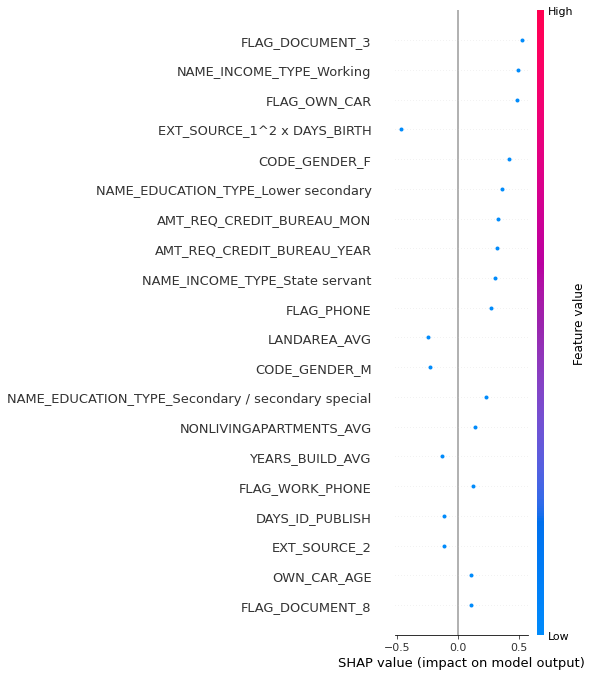

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[0][nombre2], reduced_X_test.iloc[nombre2,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], 
                shap_values[1][nombre2], 
                reduced_X_test.iloc[nombre2,:])

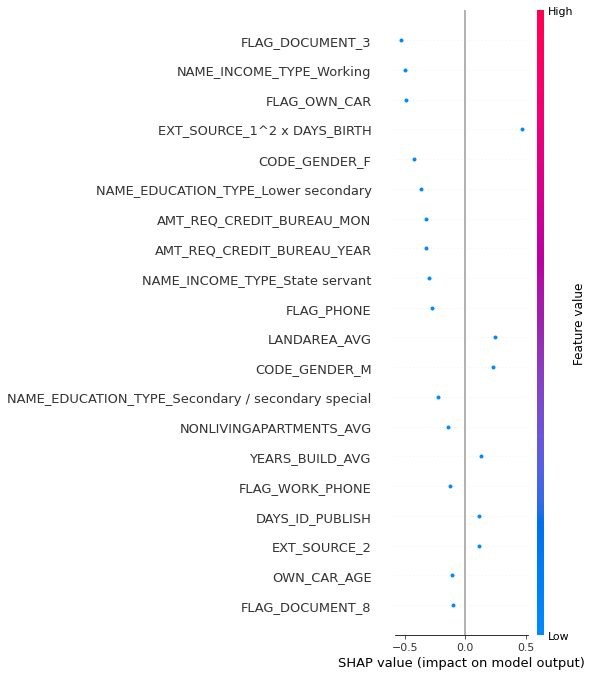

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[1][nombre2], reduced_X_test.iloc[nombre2,:])